Question 1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

Question 2: We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

Question 3: We are interested in demand forecasting, namely, what time windows are most likely to have large number of simultaneous players. This is because we need to ensure that the number of licenses on hand is sufficiently large to accommodate all parallel players with high probability.


1) Data Description:
Provide a full descriptive summary of the dataset, including information such as

1) the number of observations

2) summary statistics(report values to 2 decimal places)

3) number of variables

5) name and type of variables

6) what the variables mean,

7) any issues you see in the data

8) any other potential issues related to things you cannot directly see

9) how the data were collected

Make sure to use bullet point lists or tables to summarize the variables in an easy-to-understand format.
Note that the selected dataset(s) will probably contain more variables than you need. In fact, exploring how the different variables in the dataset affect your model may be a crucial part of 
the project. You need to summarize the full data regardless of which variables you may choose to use later on.


In [54]:
library(tidyverse)
library(scales)


In [55]:
#sessions
#s <- sessions|>
#summarize(mean_start_time = mean(original_start_time),
#         (mean_end_time = mean(original_end_time, na.rm=TRUE)))
#s


In [56]:
players <- read_csv("players.csv")
#players


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# Data Description of players dataset 这就已经200字了超字数了。

- Number of observations: 196
- number of variables: 7

## Variable Descriptions
### Name, type and meaning of variables
- experience(character):
The player’s level of game experience.(e.g."Beginner", "Veteran", "Amateur", or "Pro")

- subscribe(logical):
Indicates whether the player subscribed to a game-related newsletter. TRUE means subscribed, and FALSE means not subscribed.

- hashedEmail(character):
Player’s email address in hashed version.

- played_hours(double):
The total number of hours the player has spent playing the game.

- name(character):
Name of the player.

- gender(character):
Gender of the player.

- Age(double):
Age of the player in years.

### Summary statistics of numeric variables
A Mean and a standard derivation is measured for the two numeric variables played_hours and Age in the players dataset. The result value is rounded to 2 decimal places.
- played_hours has a mean of 5.85 hours and a standard deviation of 28.36 hours.

- Age has a mean of 21.74 years and a standard deviation of 7.39 years.
Below is a tibble output showing the summary statistics.

### Issues in the data
- The experience and gender variables are stored as character types but should be factor types.
- The age variable contains missing values (NAs).
- Potential issue: player's experience level is self-reported and may be subjective.

The data were collected from https://plaicraft.ai.


废稿存放
#experience variable and gender should be a logical data type.
#played hour data is usually small only except a few
#NA in age varaible


In [57]:
players <- read_csv("players.csv")


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [58]:
summary_stat <- players|>
summarize(mean_played_hours = mean(played_hours, na.rm = TRUE),
          sd_played_hours = sd(played_hours, na.rm = TRUE),
          mean_age = mean(Age, na.rm = TRUE),
          sd_age = sd(Age, na.rm = TRUE))|>
round(2)
summary_stat


mean_played_hours,sd_played_hours,mean_age,sd_age
<dbl>,<dbl>,<dbl>,<dbl>
5.85,28.36,21.14,7.39


(2) Questions:
Clearly state one broad question that you will address, and the specific question that you have formulated. Your question should involve one response variable of interest and one or more explanatory variables, and should be stated as a question. One common question format is: “Can [explanatory variable(s)] predict [response variable] in [dataset]?”, but you are free to format your question as you choose so long as it is clear. Describe clearly how the data will help you address the question of interest. You may need to describe how you plan to wrangle your data to get it into a form where you can apply one of the predictive methods from this class.


草稿区域：

Question based on Question 2. Can age predict played hours? 需要点名是provide more data吗？应该不用？
- 然后出一个scatter plot，用model检验rmse来确认行不行
q2问的可能会提供大量数据到底应该指哪个？？？
- 第三题该怎么做？做一个histogram分成小部分，看哪个地方频率高？那我可以问什么时间窗口登入的人最多？然后做个histogram？

The broad question I will address is question 2. The specific quesiton I have is: 

Can Age prodict played hours in players dataset?


can xx predict xx? scatter plot?
can age predict subscribe? specific question?
can xx predict xx?
scatter plot?
can age predict subscribe?


# Questions
### Broad question: Question 2
### Specific question: Can age predict played hours?
不确定这个写的对不对？我没有提到和histogram相关的内容。By finding out the relationship between variables Age and player_hours in players dataset using scatter plot, it can help me address this question.
I plan to select the Age and the player_hours column 兄弟wrangling是给apply predict method用的吗？那不是应该step center吗？？


(3) Exploratory Data Analysis and Visualization
In this assignment, you will:
1) Demonstrate that the dataset can be loaded into R.
2) Do the minimum necessary wrangling to turn your data into a tidy format. Do not do any additional wrangling here; that will happen later during the group project phase.
3) Compute the mean value for each quantitative variable in the players.csv data set. Report the mean values in a table format.
4) Make a few exploratory visualizations of the data to help you understand it.
Use our visualization best practices to make high-quality plots (make sure to include labels, titles, units of measurement, etc) Explain any insights you gain from these plots that are relevant to address your question

Note: do not perform any predictive analysis here. We are asking for an exploration of the relevant variables to demonstrate that you understand them well before performing any additional modelling, and to identify potential problems you anticipate


# Exploratory Data Analysis and Visualization
- The dataset has been loaded into R using read_csv function.
- The player dataset and is already tidy. To address my question of interest, selecting Age and played_hours columns  and skiping NA values in the players dataset are the necessary wrangling steps.
- The mean value for quantitative variable Age and played_hours is reported in the tibble below.
- The scatter plot var_relation visualize the relationship between player's age and their played hours. The plot demonstrates that the played hours tend to decrease as age of players increases. It suggests that there may be a weak non-linear relationship between two varaibles.
- The histogram phr_histo shows the overall distribution of played hours. It suggests that a large number of players have played very few hours (close to zero).
- The histogram XXX compares the age distributions of players who played less than 0.5 hours and those who played more than 0.5 hours. Both distributions concentrated in the 15–18 age range. This indicates that age may not effectively differentiate how much they play.
- 

Exploratory Data Analysis and Visualization
- The dataset has been loaded into R.
- Both the players and sessions dataset and is already tidy. To address my question of interest, selecting Age and played_hours columns in the players dataset is the only necessary wrangling step.
- ？？？？？那个时间算tidy吗需要split cell吗，data tye不对需要修改吗

- Below is a tibble output showing the mean value for quantitative variable player_hours and Age in the players.csv data set.
- Below is a scatterplot of relationship between age and played hours. The plot shows that as ages increases, the played hours decreases.
- Another historgram b help visulize the distribution of age among all players. 我是可以这么写，但是看上去这个和我回答问题关系并不大？
- ???????这个更奇怪的了Another historgram c help visulize the distribution of played hours among all players. it is noticeable that, hich may be an outlier. it is noticeable that there are large amount of people that didn't play the game.
- 

- #上面这句写的对吗，这好像也不是linear？这一个解释够吗，需不需要再写点，例如我们发现年轻人玩游戏时间更多。这回应了我的问题，以及我选的大方向问题？怎么做第二个graph出来？
- 到底是我的问题有问题还是什么？
- 
#########
###The dataset players is already in tidy data format. To 
###players: skip NA, change data type
   sessions: split cell
###4. mean
5. ?? specific question? just explore?
#########


In [59]:
players_wrang <- players|>
select(Age, played_hours)|>
drop_na()
#players_wrang


In [60]:
players_mean <- players|>
summarise(played_hours_mean = mean(played_hours, na.rm=TRUE),
          age_mean = mean(Age, na.rm=TRUE))
players_mean


played_hours_mean,age_mean
<dbl>,<dbl>
5.845918,21.13918


Warning message in scale_y_log10(labels = label_comma()):
“log-10 transformation introduced infinite values.”


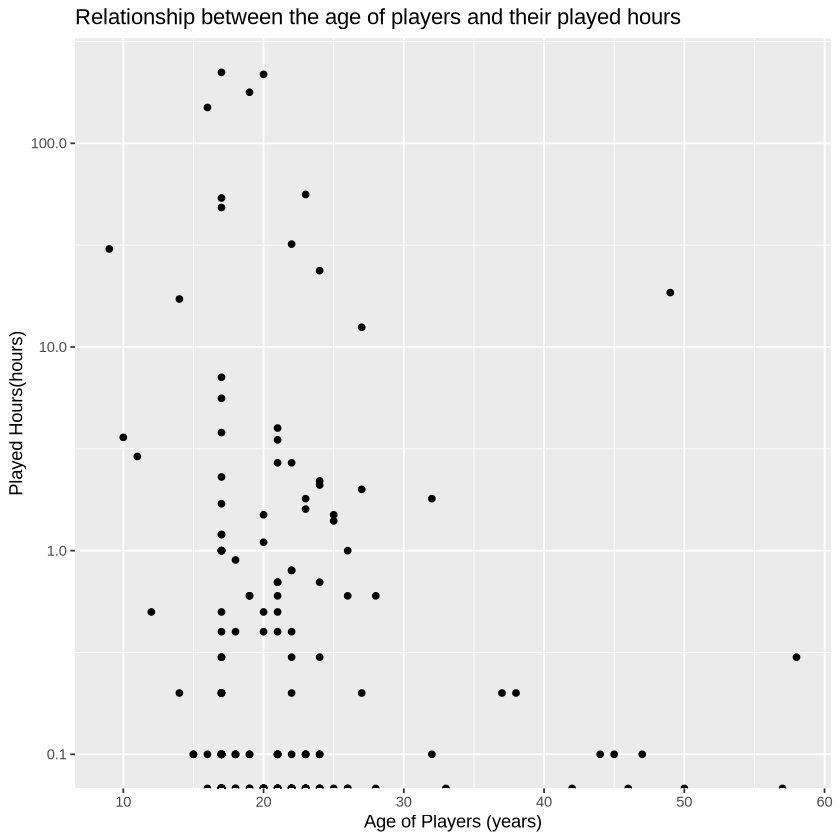

In [61]:
var_relation <- players_wrang|>
ggplot(aes(x= Age, y=played_hours))+
geom_point()+
labs(x="Age of Players (years)", y="Played Hours(hours)", 
     title="Relationship between the age of players and their played hours")+
#scale_x_log10(labels = label_comma())+
scale_y_log10(labels = label_comma())
var_relation


Warning message in scale_x_log10(labels = label_comma()):
“log-10 transformation introduced infinite values.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 85 rows containing non-finite outside the scale range (`stat_bin()`).”


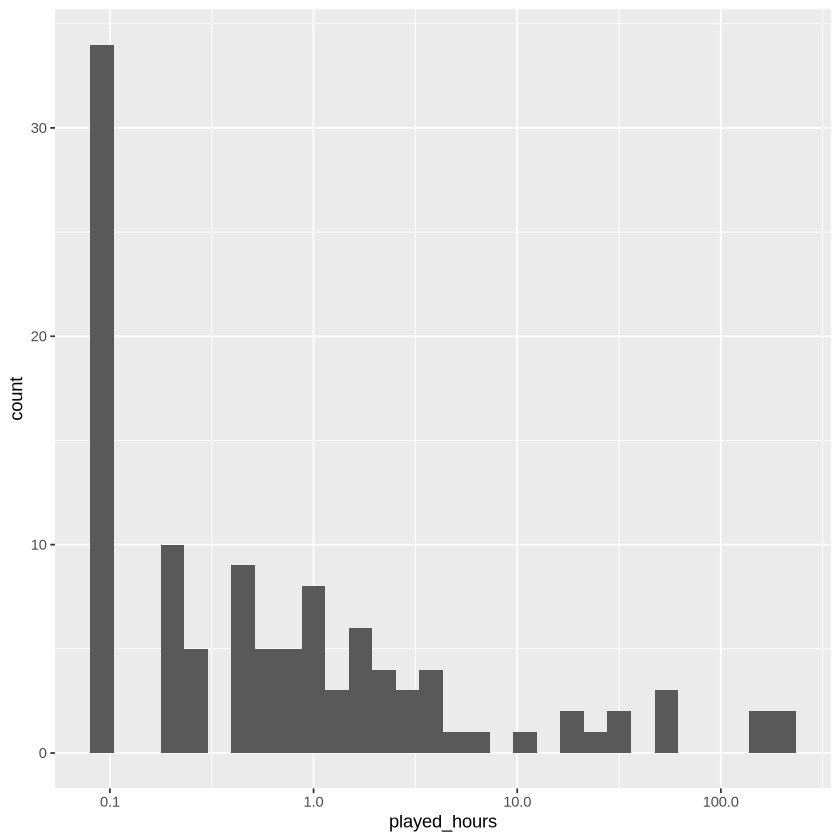

In [67]:
phr_hist <- players|>
#filter(played_hours >= 0)|>
ggplot(aes(x=played_hours))+
geom_histogram()+
scale_x_log10(labels = label_comma())
phr_hist


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


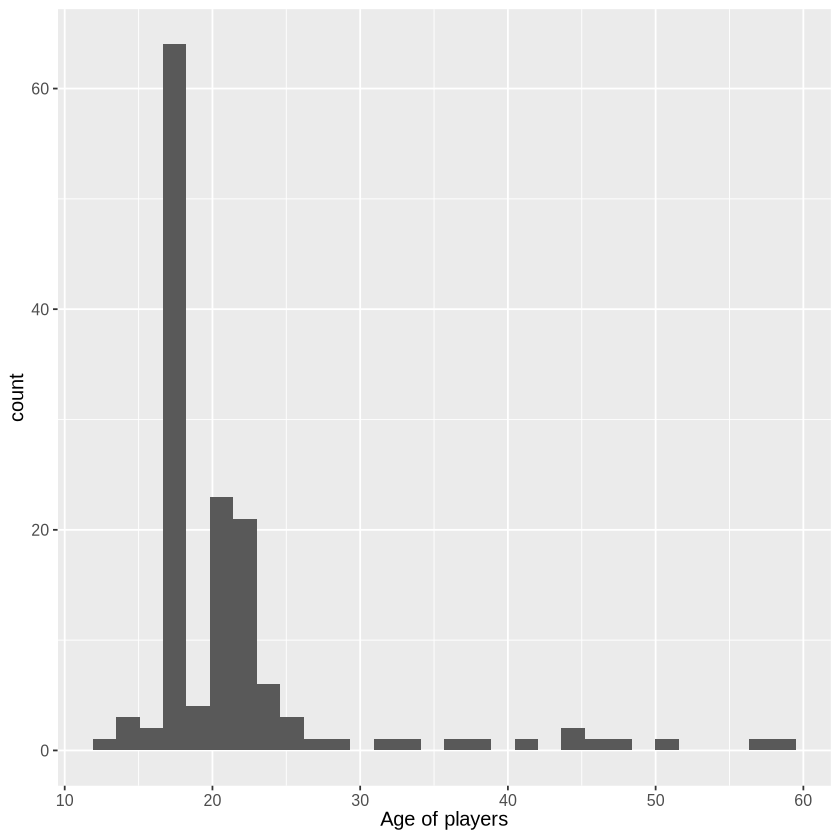

In [70]:
no_played_age <- players_wrang|>
filter(played_hours <= 0.5)|>
ggplot(aes(x= Age))+
geom_histogram()+
xlab("Age of players")+
theme(text = element_text(size = 12))
no_played_age


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


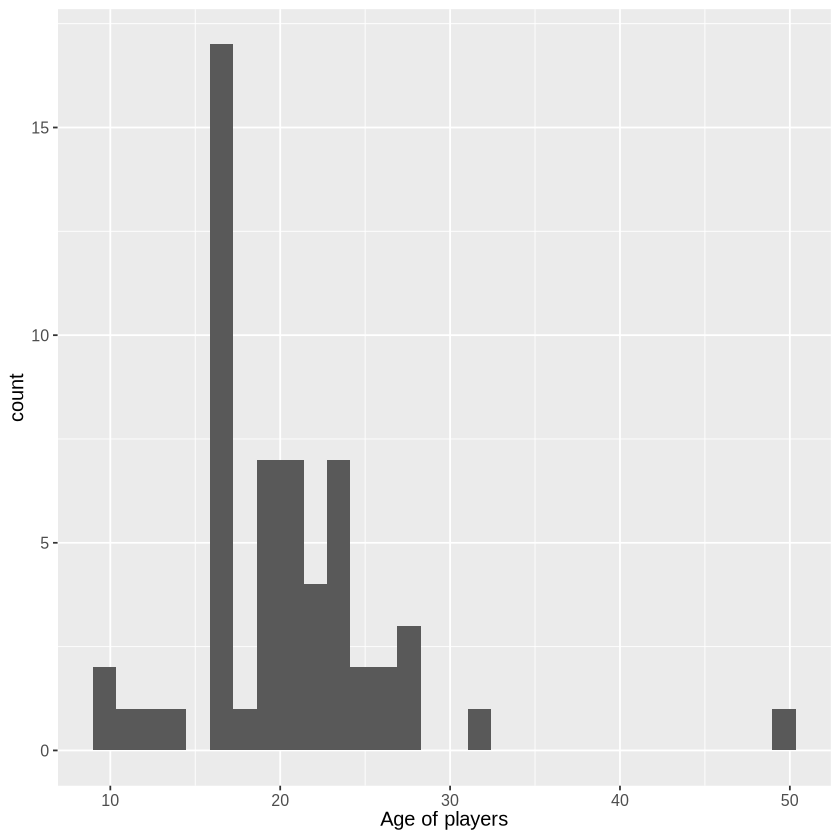

In [71]:
played_age <- players_wrang|>
filter(played_hours >= 0.5)|>
ggplot(aes(x= Age))+
geom_histogram()+
xlab("Age of players")+
theme(text = element_text(size = 12))
played_age


4. Methods and Plan


Propose one method to address your question of interest using the selected dataset and explain why it was chosen.你问的为什么要选这个dataset吗？
Do not perform any modelling or present results at this stage. We are looking for high-level planning regarding model choice and justifying that choice. In your explanation, respond to the following questions:
1. Why is this method appropriate?
2. Which assumptions are required, if any, to apply the method selected?
3. What are the potential limitations or weaknesses of the method selected?
4. How are you going to compare and select the model?
5. How are you going to process the data to apply the model? For example: Are you splitting the data? How? How many splits?
6. What proportions will you use for the splits? At what stage will you split? Will there be a validation set? Will you use cross validation?
7. 

##

# Methods and Plan
- The method to address this question is using the Knn regression model. Since the response variable (played_hours) is a numeric variable, KNN classification would not be suitable. In addition, the scatterplot suggests a non-linear relationship between age and played hours, so a linear regression model would not be suitable.
- ?????? KNN regression does not require strict statistical assumptions for data appearences.
- ??????还是上面那个问题，是不是要假设他俩有强关联？这个好像是classification吧。和standardlize数据有关吗？得select appropirate
- 一定要选择相关的变量？变量一多会卡？
- I will try a range of k values and compare models using Root Mean Squared Error (RMSE) on the validation set. The model with the lowest RMSE will be selected.
- I will split the dataset into training and testing sets. The training set will be used to fit and tune the KNN model, while the testing set will be used to evaluate its final performance.
- I will split the data 75% training and 25% testing. The split will be done before recipe?????????. I will use 5-fold cross-validation to select the best value of k. There will be validation sets to help evaluate the model.
- 

??????怎么是自己的问题
how can xx predict xx为什么会用到modelling？
如果是大问题。我感觉第三题都不用model啊？histogram一拉不就知道什么时候出现的人最多了吗？
1.To discover whether there is a relationship between two numeric variables, a scatter plot would be appropriate.
2.没有
3.
##########
question 1: use knn classification
1. because we are pridicting a category, therefore knn classification would be the best fit.
2. ??
3. read textbook
4. select different k and compare the model with their accuracy?
5. ?? preprocess? tidydata?
6. ??

##############

1. chosing knn regression. it is approprate cause we have numeric varibales here, and the scatter plot shows that there may not be a linear relationship between the prodictor and response variable.
2. ??? knn regression有什么assumptions？
3. ??? 慢？
4. compare，select-> try different k? tuning the model that has the lowest rmse
5. select two columns needed split data in to training and testing. split training into 5 folds and test different k
6. 你和上头是一块的吗？？75%。at what stage是什么？有cross就有validation呗。
##########


In [65]:
 does a pridcict play time


ERROR: Error in parse(text = x, srcfile = src): <text>:1:7: unexpected symbol
1:  does a
          ^
